In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

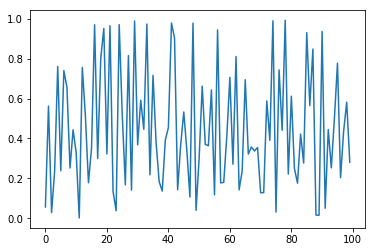

In [2]:
x=np.random.rand(100)
plt.plot(x)

In [4]:
from statsmodels.tsa.stattools import adfuller as ADF
print "ADF平稳性检验结果为：",ADF(x)

ADF平稳性检验结果为： (-13.753057698347071, 1.0418139994330709e-25, 0L, 99L, {'5%': -2.8912082118604681, '1%': -3.4981980821890981, '10%': -2.5825959973472097}, 31.425475756745925)


In [8]:
from statsmodels.stats.diagnostic import acorr_ljungbox
print "白噪声检验结果为：",acorr_ljungbox(x,lags=1)

白噪声检验结果为： (array([ 10.13062721]), array([ 0.00145826]))


F:\Anaconda\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


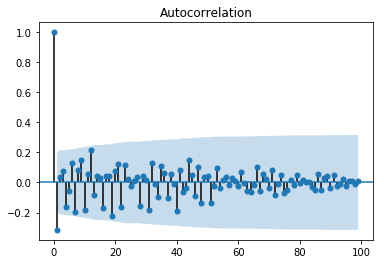

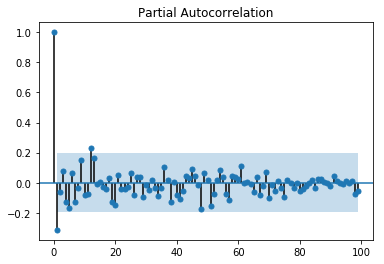

In [10]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(x).show()
plot_pacf(x).show()

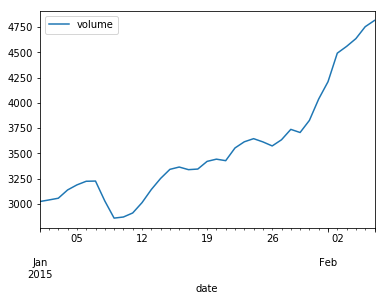

In [11]:
data=pd.read_csv('data/arima_data.csv',index_col='date')
data.index=pd.to_datetime(data.index)
data.plot()
plt.show()

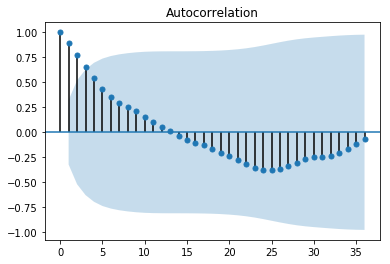

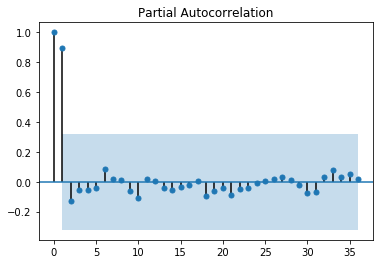

In [13]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(data).show()
plot_pacf(data).show()

In [14]:
print "原始序列的ADF检验结果为：",ADF(data['volume'])

原始序列的ADF检验结果为： (1.8137710150945268, 0.99837594215142644, 10L, 26L, {'5%': -2.9812468047337282, '1%': -3.7112123008648155, '10%': -2.6300945562130176}, 299.46989866024177)


In [15]:
print "原始序列的白噪声检验结果为：",acorr_ljungbox(data['volume'],lags=1)

原始序列的白噪声检验结果为： (array([ 32.0111333]), array([  1.53291527e-08]))


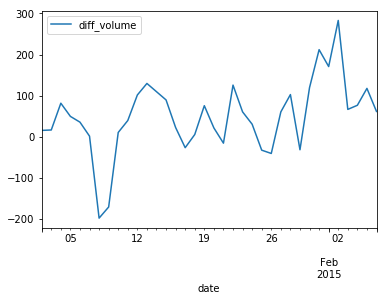

 差分序列的PACF自相关系数为： [  1.           0.55314874  -0.12406667   0.044397    -0.31234376
   0.20251443  -0.23905056   0.06724459   0.27567833   0.03209532
  -0.40106594   0.11398223   0.07561016  -0.09216062  -0.33281651
   0.60702422  -0.13223037   0.08260084  -0.04758601   0.28149385
  -0.17904239  -0.35002462  -1.29141613  -0.77200299   2.37943856
  -0.64771334   7.02510081   0.92976164   0.87492188  -0.57600616
  -0.90666326 -15.33019745   0.95718577  -0.53278259  -2.85629589
   0.28111938          nan          nan          nan          nan
          nan]
差分序列的ADF检验结果为： (-3.1560562366723537, 0.022673435440048798, 0L, 35L, {'5%': -2.9485102040816327, '1%': -3.6327426647230316, '10%': -2.6130173469387756}, 287.59090907803341)


F:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1127: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
F:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1119: RuntimeWarning: invalid value encountered in double_scalars
  r[k] = (X[0:-k]*X[k:]).sum() / denom(k)


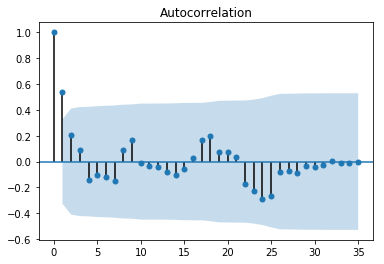

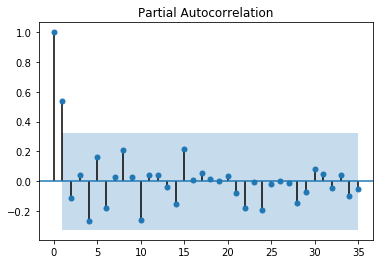

In [21]:
D_data=data.diff().dropna()
D_data.columns=['diff_volume']
D_data.plot()
plt.show()

from statsmodels.tsa.stattools import pacf as PACF
plot_acf(D_data).show()
print "差分序列的PACF自相关系数为：",PACF(D_data['diff_volume'])

plot_pacf(D_data).show()
print "差分序列的ADF检验结果为：",ADF(D_data['diff_volume'])

In [22]:
print "差分序列的白噪声检验结果为：",acorr_ljungbox(D_data['diff_volume'],lags=1)

差分序列的白噪声检验结果为： (array([ 11.30402222]), array([ 0.00077339]))


In [28]:
#?ADF#单位根检验
print type(data)
data['volume']=data['volume'].astype(float)

<class 'pandas.core.frame.DataFrame'>


In [29]:
from statsmodels.tsa.arima_model import ARIMA

pmax=int(len(D_data)/10)
qmax=int(len(D_data)/10)

data['volume']=data['volume'].astype(float)

bic_matrix=[]

for p in range(pmax+1):
    tmp=[]
    for q in range(qmax+1):
        try:
            tmp.append(ARIMA(data,(p,1,q)).fit().bic)
        except:
            tmp.append(None)
    bic_matrix.append(tmp)

bic_matrix=pd.DataFrame(bic_matrix)
print bic_matrix

p,q=bic_matrix.stack().idxmin()
print "BIC最小的p值和q值：%s, %s"%(p,q)

F:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:654: RuntimeWarning: divide by zero encountered in divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
F:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:628: RuntimeWarning: invalid value encountered in divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
F:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:629: RuntimeWarning: invalid value encountered in divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
F:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:654: RuntimeWarning: divide by zero encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
F:\Anaconda\lib\site-packages\statsmodels\tools\numdiff.py:243: RuntimeWarning: invalid value encountered in subtract
  **kwargs)).imag/2./hess[i, j]
F:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:654: RuntimeWarning: invalid value encountered in log
  R_mat, T_mat)
F:\Anaconda\lib\site-packages\stats

            0           1           2           3
0  432.068472  422.510082  426.088911  426.595507
1  423.628276  426.073601         NaN         NaN
2  426.774824  427.395821         NaN         NaN
3  430.317524         NaN         NaN  436.478109
BIC最小的p值和q值：0, 1


In [30]:
model = ARIMA(data,(p,1,q)).fit()
resid=model.resid

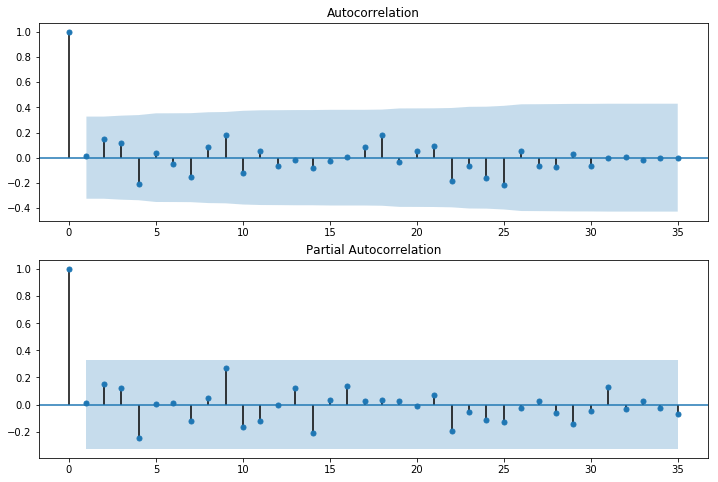

In [31]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=plot_acf(resid.values.squeeze(),lags=35,ax=ax1)
ax2=fig.add_subplot(212)
fig=plot_pacf(resid,lags=35,ax=ax2)

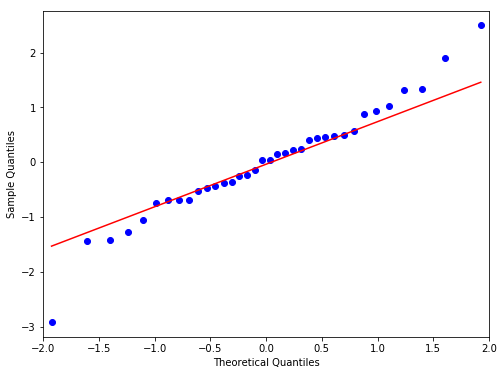

In [32]:
from statsmodels.graphics.api import qqplot
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
fig=qqplot(resid,line='q',ax=ax,fit=True)

In [34]:
from statsmodels.tsa.stattools import acf as ACF

r1,q1,p1=ACF(resid.values.squeeze(),qstat=True)
tmp=np.c_[range(1,36),r1[1:],q1,p1]
table=pd.DataFrame(tmp,columns=['lag',"AC","Q",'Prob(>Q)'])
print (table.set_index('lag')[:15])

            AC         Q  Prob(>Q)
lag                               
1.0   0.009995  0.003905  0.950176
2.0   0.151097  0.922486  0.630500
3.0   0.119393  1.513403  0.679180
4.0  -0.212564  3.445001  0.486290
5.0   0.034075  3.496238  0.623957
6.0  -0.053348  3.626018  0.727135
7.0  -0.157088  4.790082  0.685563
8.0   0.082868  5.125587  0.744073
9.0   0.180436  6.775151  0.660516
10.0 -0.119683  7.528820  0.674754
11.0  0.051306  7.672861  0.742274
12.0 -0.062678  7.896789  0.793143
13.0 -0.020659  7.922174  0.848633
14.0 -0.078650  8.306819  0.872737
15.0 -0.024755  8.346738  0.909130


In [35]:
print "残差的白噪声检验结果为：",acorr_ljungbox(resid,lags=1)

残差的白噪声检验结果为： (array([ 0.00390451]), array([ 0.95017574]))


In [36]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARIMA
====================================================================
Model:              ARIMA            BIC:                 422.5101  
Dependent Variable: D.volume         Log-Likelihood:      -205.88   
Date:               2017-04-14 14:05 Scale:               1.0000    
No. Observations:   36               Method:              css-mle   
Df Model:           2                Sample:              01-02-2015
Df Residuals:       34                                    02-06-2015
Converged:          1.0000           S.D. of innovations: 73.086    
AIC:                417.7595         HQIC:                419.418   
---------------------------------------------------------------------
                   Coef.   Std.Err.    t     P>|t|    [0.025   0.975]
---------------------------------------------------------------------
const             49.9564   20.1390  2.4806  0.0182  10.4847  89.4281
ma.L1.D.volume     0.6710    0.1648  4.0712  0.0003   0.3480   0.9941
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
MA.1           -1.4902             0.0000           1.4902             0.5000
====================================================================

"""

In [37]:
forecastnum=5
model.forecast(forecastnum)

(array([ 4873.9667493 ,  4923.92317644,  4973.87960359,  5023.83603073,
         5073.79245787]),
 array([  73.08574293,  142.32679918,  187.542821  ,  223.80281869,
         254.95704265]),
 array([[ 4730.72132537,  5017.21217324],
        [ 4644.96777602,  5202.87857687],
        [ 4606.30242887,  5341.4567783 ],
        [ 4585.19056646,  5462.48149499],
        [ 4574.08583666,  5573.49907907]]))

In [38]:
model.forecast(forecastnum,alpha=0.01)

(array([ 4873.9667493 ,  4923.92317644,  4973.87960359,  5023.83603073,
         5073.79245787]),
 array([  73.08574293,  142.32679918,  187.542821  ,  223.80281869,
         254.95704265]),
 array([[ 4685.71035099,  5062.22314762],
        [ 4557.31363644,  5290.53271645],
        [ 4490.80130958,  5456.95789759],
        [ 4447.35817213,  5600.31388932],
        [ 4417.06663626,  5730.51827947]]))

            sales
Month            
1960-01-01   6550
1960-02-01   8728
1960-03-01  12026
1960-04-01  14395
1960-05-01  14587


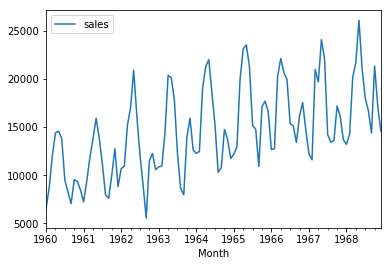

In [3]:
data=pd.read_csv('data/car-sales.csv',header=0,index_col='Month')
a=pd.read_csv('data/car-sales.csv')
data.index=pd.to_datetime(data.index)
data.columns=['sales']
print data.head()
data.plot()

In [7]:
a.columns=['Month','sales']
a.head()
print type(a['sales'])

<class 'pandas.core.series.Series'>


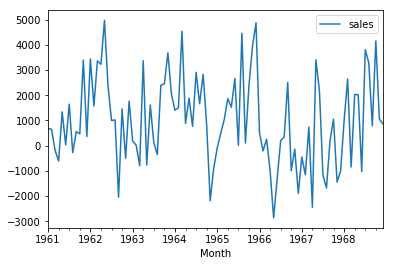

In [8]:
data=pd.read_csv('data/car-sales.csv',header=0,index_col='Month')
data.index=pd.to_datetime(data.index)
data.columns=['sales']

D_data=data.diff(12).dropna()
D_data.to_csv('data/seasonnally_adjusted.csv')
D_data.plot()

F:\Anaconda\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


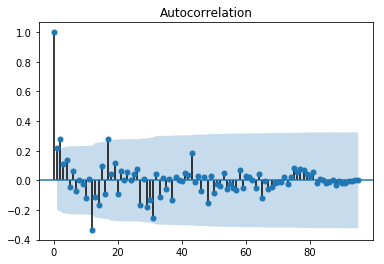

In [9]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf

D_data=pd.read_csv('data/seasonally_adjusted.csv',index_col='Month')
D_data.index=pd.to_datetime(D_data.index)
plot_acf(D_data).show()

In [11]:
D_data=pd.read_csv('data/seasonally_adjusted.csv',index_col='Month')
D_data.index=pd.to_datetime(D_data.index)
#reframe as surprvised learning
S_data=pd.DataFrame()
for i in range(12,0,-1):
    S_data['t-'+str(i)]=D_data['sales'].shift(i)
S_data['t']=D_data.values
S_data=S_data[13:]
#save to new file
S_data.to_csv('data/lags_12months_features.csv',index=False)


print S_data.head()

              t-12    t-11    t-10     t-9     t-8     t-7     t-6     t-5  \
Month                                                                        
1962-02-01   646.0  -189.0  -611.0  1339.0    30.0  1645.0  -276.0   561.0   
1962-03-01  -189.0  -611.0  1339.0    30.0  1645.0  -276.0   561.0   470.0   
1962-04-01  -611.0  1339.0    30.0  1645.0  -276.0   561.0   470.0  3395.0   
1962-05-01  1339.0    30.0  1645.0  -276.0   561.0   470.0  3395.0   360.0   
1962-06-01    30.0  1645.0  -276.0   561.0   470.0  3395.0   360.0  3440.0   

               t-4     t-3     t-2     t-1       t  
Month                                               
1962-02-01   470.0  3395.0   360.0  3440.0  1573.0  
1962-03-01  3395.0   360.0  3440.0  1573.0  3363.0  
1962-04-01   360.0  3440.0  1573.0  3363.0  3226.0  
1962-05-01  3440.0  1573.0  3363.0  3226.0  4974.0  
1962-06-01  1573.0  3363.0  3226.0  4974.0  2384.0  


滞后观察值的重要得分：
[ 0.220692    0.06444966  0.05597269  0.03637144  0.06798764  0.10012901
  0.08632594  0.05120944  0.10782591  0.0422795   0.10044342  0.06631336]


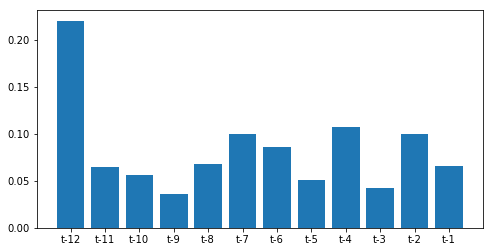

In [13]:
from sklearn.ensemble import RandomForestRegressor
#load data
S_data=pd.read_csv('data/lags_12months_features.csv',header=0)
array=S_data.values

#split into input and  output

X=array[:,0:-1]
y=array[:,-1]

#fit random forest model
model=RandomForestRegressor(n_estimators=50,random_state=1)
model.fit(X,y)

#show importance scores
print '滞后观察值的重要得分：'
print model.feature_importances_

#lplot importance scores
names=S_data.columns.values[0:-1]
ticks=[i for i in range(len(names))]
plt.rc('figure',figsize=(8,4))
plt.bar(ticks,model.feature_importances_)
plt.xticks(ticks,names)
plt.show()

Selected Features:
t-12
t-6
t-4
t-2


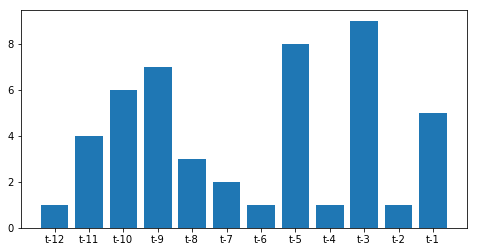

In [15]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

#load dataset
S_data=pd.read_csv('data/lags_12months_features.csv',header=0)
array=S_data.values
# separate input and output variables
X=array[:,0:-1]
y=array[:,-1]

rfe=RFE(RandomForestRegressor(n_estimators=500,random_state=1),4)
fit=rfe.fit(X,y)

#report selected features
print 'Selected Features:'
names=S_data.columns.values[0:-1]
for i in range(len(fit.support_)):
    if fit.support_[i]:
        print(names[i])
        
# plot feature rank
plt.rc('figure',figsize=(8,4))
ticks=[i for i in range(len(names))]
plt.bar(ticks,fit.ranking_)
plt.xticks(ticks,names)
plt.show()

In [16]:
data=pd.read_csv('data/car-sales.csv',header=0,index_col='Month')
data.index=pd.to_datetime(data.index)
data.columns=['sales']

In [17]:
D_data=data.diff(12).dropna()

In [18]:
D_data.tail()

,sales
Month,
1968-08-01,3288.0
1968-09-01,787.0
1968-10-01,4155.0
1968-11-01,1061.0
1968-12-01,864.0


In [20]:
from statsmodels.tsa.arima_model import ARIMA
#fit model
model=ARIMA(D_data,(7,0,0)).fit(trend='nc',disp=0)
print model.summary2()

#forecastnum=5
#yHat=model.forecast(forecastnum,alpha=0.01)

                            Results: ARMA
Model:              ARMA             BIC:                 1737.5227 
Dependent Variable: sales            Log-Likelihood:      -850.50   
Date:               2017-05-08 17:07 Scale:               1.0000    
No. Observations:   96               Method:              css-mle   
Df Model:           7                Sample:              01-01-1961
Df Residuals:       89                                    12-01-1968
Converged:          1.0000           S.D. of innovations: 1698.179  
AIC:                1717.0079        HQIC:                1725.300  
----------------------------------------------------------------------
               Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
----------------------------------------------------------------------
ar.L1.sales    0.2395     0.1013    2.3635   0.0203    0.0409   0.4381
ar.L2.sales    0.2635     0.1034    2.5486   0.0125    0.0609   0.4662
ar.L3.sales    0.0748     0.1080    0.6926   0.4904

In [28]:
def RMSE(yArr,yHatArr):
    return np.sqrt(((yArr-yHatArr)**2).sum()/len(yArr))

In [29]:
train,test=D_data[D_data.index<'1968'],D_data['1968']
years=['1967','1966','1965','1964','1963','1962','1961']

In [30]:
rmseList=list()
for year in years:
    dataset=train[train.index>=year]
    #walk forward over time steps in test
    values=dataset.values
    history=[values[i] for i in range(len(values))]
    predictions=list()
    test_values=test.values
    for t in range(len(test_values)):
        #fit model
        model=ARIMA(history,order=(1,0,0)).fit(trend='nc',disp=0)
        #make prediction
        yHat=model.forecast()[0]
        predictions.append(yHat)
        history.append(test_values[t])
    rmse=RMSE(test_values,predictions)
    rmseList.append(rmse)
    print('%s-%s (%d values) RMSE: %.3f' % (years[0],year,len(values),rmse))

1967-1967 (12 values) RMSE: 7982.411
1967-1966 (24 values) RMSE: 7690.509


F:\Anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1967-1965 (36 values) RMSE: 7148.796
1967-1964 (48 values) RMSE: 7065.854
1967-1963 (60 values) RMSE: 7061.616
1967-1962 (72 values) RMSE: 7022.937
1967-1961 (84 values) RMSE: 7032.900


In [31]:
print rmseList

[7982.4105683376483, 7690.5085936344949, 7148.7957107066113, 7065.8541250028411, 7061.6160512311444, 7022.9370556812009, 7032.8995295428886]


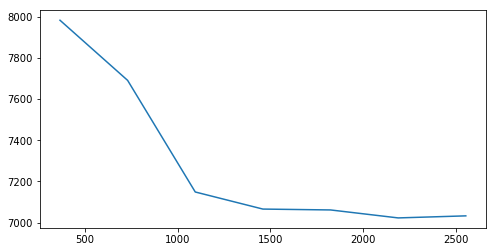

In [32]:
x=[365,730,1095,1460,1825,2190,2555]
plt.plot(x,rmseList)
plt.show()

In [33]:
data=pd.read_csv('data/car-sales.csv',header=0,index_col='Month')
data.index=pd.to_datetime(data.index)
data.columns=['sales']

In [34]:
data.head()

,sales
Month,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587


In [35]:
print data['sales'][0]

6550
